In [22]:

%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from ucimlrepo import fetch_ucirepo 
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, KFold, cross_val_score
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
Y = heart_disease.data.targets
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [23]:
#  decision trees, boosting family classifiers, logistic, and maybe SVMs
Y

,num
0,0
1,2
2,1
3,0
4,0
...,...
298,1
299,2
300,3
301,1


In [24]:
Y = (Y['num'] > 0).astype(float)

# If you need -1 instead of 0 for the negative class
Y[Y == 0] = -1

# Convert to numpy array and reshape to ensure it's a column vector
Y = Y.values.reshape(-1, 1)

Y

array([[-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
      

In [25]:
X_and_Y = np.hstack((X, Y))     # Stack them together for shuffling.
np.random.seed(1)               # Set the random seed.
np.random.shuffle(X_and_Y)  

print(Y.shape)
print(X.shape)
print(X_and_Y[0])

(303, 1)
(303, 13)
[ 43.   1.   4. 110. 211.   0.   0. 161.   0.   0.   1.   0.   7.  -1.]


In [30]:
X_shuffled = X
Y_shuffled = Y
X_train = X_shuffled[:200]
Y_train = Y_shuffled[:200]
X_test = X_shuffled[200:]
Y_test = Y_shuffled[200:]
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(200, 13)
(200, 1)
(103, 13)
(103, 1)


In [31]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

param_grid = {'max_depth': [1, 2, 3, 4, 5]}
estimator = tree.DecisionTreeClassifier(criterion='entropy')

# Perform GridSearchCV
grid_search = GridSearchCV(estimator, param_grid, cv=10, scoring="accuracy")
grid_search.fit(X, Y)

# Get best hyperparameters
best_params = grid_search.best_params_

In [32]:
print(best_params)

{'max_depth': 3}


In [ ]:


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
#import seaborn as sns

partitions = [0.2, 0.5, 0.8]

# new list code 
train_accuracies = []
test_accuracies = []


for partition in partitions:

    # new code to remember errors
    partition_train_acc = []
    partition_test_acc = []

    for trial in range(3):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=partition)

        best_model = DecisionTreeClassifier(criterion='entropy', **best_params, random_state=None)
        # random state = None ensures a random data split within the partitions 

        # Fit the model
        best_model.fit(X_train, Y_train)
        
        # Calculate accuracies
        train_acc = best_model.score(X_train, Y_train)
        test_acc = best_model.score(X_test, Y_test)

        # new code to remember the errors 
        partition_train_acc.append(train_acc)
        partition_test_acc.append(test_acc)

        y_pred = best_model.predict(X_test)

        # Print classification report for predictions
        print(classification_report(Y_test, y_pred))
        
        # Print results for this trial directly
        print(f"Partition: {partition*100:.0f}/100, Trial: {trial+1}")
        print(f"Train Accuracy: {train_acc:.4f}")
        # print(f"Validation Accuracy: {val_acc:.4f}")
        print(f"Test Accuracy: {test_acc:.4f}")

    # new code to remember errors
    avg_train_acc = np.mean(partition_train_acc)
    avg_test_acc = np.mean(partition_test_acc)

    # Store average accuracies for this partition
    train_accuracies.append(avg_train_acc)
    test_accuracies.append(avg_test_acc)


results_df = pd.DataFrame({
    'Partition': [f"{partition*100:.0f}/100" for partition in partitions],
    'Average Train Accuracy': train_accuracies,
    'Average Test Accuracy': test_accuracies,
})

print("\nAverage Accuracies:")
print(results_df)
    
# verify if i need to d ogrid search before 
# find best hyperparameter and then run the trials 
# cross validation is used to find best parameters
    

              precision    recall  f1-score   support

        -1.0       0.77      0.68      0.72       135
         1.0       0.65      0.75      0.70       108

    accuracy                           0.71       243
   macro avg       0.71      0.72      0.71       243
weighted avg       0.72      0.71      0.71       243

Partition: 20/100, Trial: 1
Train Accuracy: 0.9167
Test Accuracy: 0.7119
              precision    recall  f1-score   support

        -1.0       0.72      0.87      0.79       129
         1.0       0.81      0.62      0.70       114

    accuracy                           0.75       243
   macro avg       0.76      0.75      0.75       243
weighted avg       0.76      0.75      0.75       243

Partition: 20/100, Trial: 2
Train Accuracy: 0.9167
Test Accuracy: 0.7531
              precision    recall  f1-score   support

        -1.0       0.62      0.83      0.71       132
         1.0       0.66      0.40      0.49       111

    accuracy                        

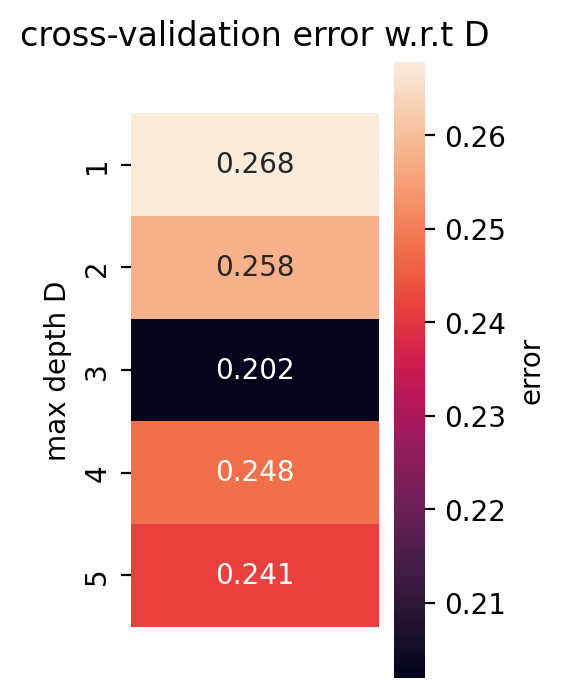

In [34]:
import seaborn as sns

D_list = [1, 2, 3, 4, 5]

def draw_heatmap(errors, D_list, title):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(errors, annot=True, fmt='.3f', yticklabels=D_list, xticklabels=[])
    ax.collections[0].colorbar.set_label('error')
    ax.set(ylabel='max depth D')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title(title)
    plt.show()


cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap(cross_val_errors, D_list, title='cross-validation error w.r.t D')